<a href="https://colab.research.google.com/github/pravin-raut/MachineLearning/blob/Master/Classification/02_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/pravin-raut/MachineLearning/Master/dataset/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BMI','DiabetesPedigreeFunction']
X = data[feature_cols] # Features
y = data.Outcome # Target variable


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)


In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=0)


In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression 


In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg.fit(X1_train, y_train)



LogisticRegression()

In [ ]:
y_pred=logreg.predict(X1_test)

In [ ]:
def generate_confustion_matrix(cnf_matrix,Algorithm):
  import seaborn as sns
  import matplotlib.pyplot as plt
  import numpy as np

  class_names=['Yes','No'] # name of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)

  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')

  # add TP, TN, FP, FN to the heatmap
  TP = cnf_matrix[1, 1]
  TN = cnf_matrix[0, 0]
  FP = cnf_matrix[0, 1]
  FN = cnf_matrix[1, 0]

  ax.text(0.65, 0.2, 'True Positives', fontsize=10, transform=ax.transAxes)
  ax.text(0.15, 0.7, 'True Negatives', fontsize=10, transform=ax.transAxes)
  ax.text(0.65, 0.7, 'False Positives', fontsize=10, transform=ax.transAxes)
  ax.text(0.15, 0.2, 'False Negatives', fontsize=10, transform=ax.transAxes)

  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix '+Algorithm, y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label') 
  plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score


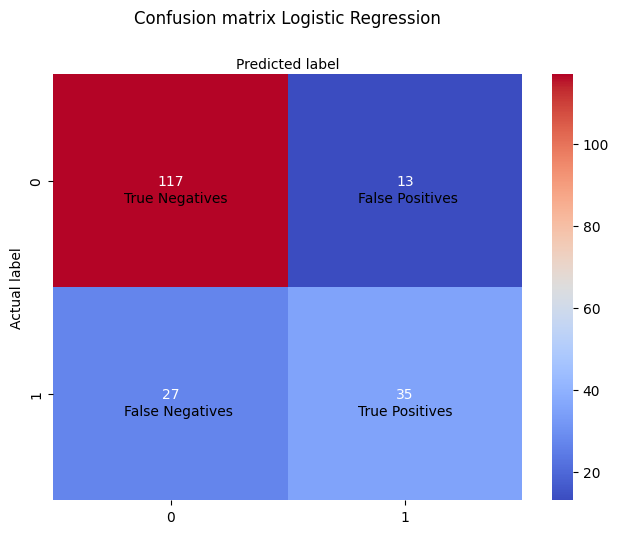

In [ ]:
cnf_matrix_lr = confusion_matrix(y_test, y_pred)
generate_confustion_matrix(cnf_matrix_lr,"Logistic Regression")

True Positives (TP): The model correctly predicts diabetes in 35 patients.

False Positives (FP): The model incorrectly predicts diabetes in 12 patients who do not have diabetes.

False Negatives (FN): The model incorrectly predicts no diabetes in 27 patients who actually have diabetes.

True Negatives (TN): The model correctly predicts no diabetes in 117 patients.

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))


Accuracy: 0.7916666666666666
Precision: 0.7291666666666666
Recall: 0.5645161290322581
